A) plotting data

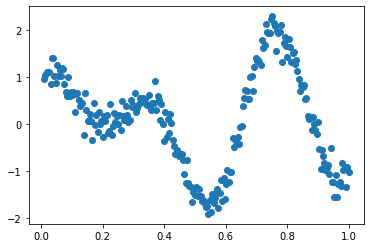

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('p1_dataset/data1_Signal.csv')

plt.scatter(df['x'], df['y'])
plt.show()